In [2]:
import string
import pandas as pd
import matplotlib.pyplot as plt

## Read training and testing data

In [3]:
data_train = pd.read_csv('data/kaggle/train.csv', index_col=0)
print('Shape of train: ', data_train.shape)
data_train.head()

Shape of train:  (159571, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data_test = pd.read_csv('data/kaggle/test_complete.csv', index_col=0)
print('Shape of test: ', data_test.shape)
data_test.head()

Shape of test:  (63978, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [6]:
data_combined = pd.concat([data_train, data_test], axis=0)
print('Shape of combined: ', data_combined.shape)

Shape of combined:  (223549, 7)


## Explore data

How many examples of each category do we have?

In [7]:
category_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
num_toxic_comments = data_train[category_cols].astype(bool).sum(axis=0)
untoxic_comments = data_train[category_cols].astype(bool).sum(axis=1)
num_untoxic_comments = untoxic_comments[untoxic_comments == 0].count()
print('Train set:')
print('no label\t', num_untoxic_comments)
print(num_toxic_comments)

Train set:
no label	 143346
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [8]:
category_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
num_toxic_comments = data_test[category_cols].astype(bool).sum(axis=0)
untoxic_comments = data_test[category_cols].astype(bool).sum(axis=1)
num_untoxic_comments = untoxic_comments[untoxic_comments == 0].count()
print('Test set:')
print('no label\t', num_untoxic_comments)
print(num_toxic_comments)

Test set:
no label	 57735
toxic            6090
severe_toxic      367
obscene          3691
threat            211
insult           3427
identity_hate     712
dtype: int64


How long are the comments in the training set?

Mean length:  391.0127086231654
Median length:  203.0
Maximum length:  5000
Minimum length:  1


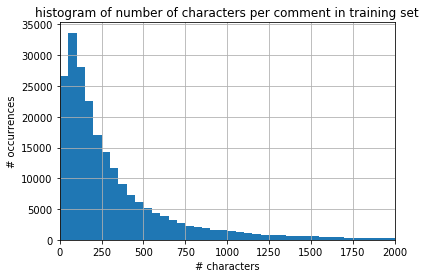

In [12]:
comment_lengths = data_combined['comment_text'].apply(lambda x: len(x))
print('Mean length: ', comment_lengths.mean())
print('Median length: ', comment_lengths.median())
print('Maximum length: ', max(comment_lengths))
print('Minimum length: ', min(comment_lengths))

comment_lengths.hist(bins=100)
plt.title('histogram of number of characters per comment in training set')
plt.xlabel('# characters')
plt.ylabel('# occurrences')
plt.xlim(0,2000)
plt.show()

What is the rate of punctuation compared to all characters in a comment?

Mean punctuation rate:  0.051157522379283775
Median punctuation rate:  0.040632054176072234
Maximum punctuation rate:  1.0
Minimum punctuation rate:  0.0


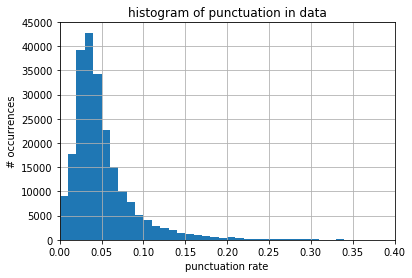

In [13]:
count_occurences = lambda c, l: sum([1 for x in c if x in l])
num_of_punctuation = data_combined['comment_text'].apply(lambda x: count_occurences(x, string.punctuation))

punctuation_rates = (num_of_punctuation / comment_lengths)

print('Mean punctuation rate: ', punctuation_rates.mean())
print('Median punctuation rate: ', punctuation_rates.median())
print('Maximum punctuation rate: ', max(punctuation_rates))
print('Minimum punctuation rate: ', min(punctuation_rates))

punctuation_rates.hist(bins=100)
plt.title('histogram of punctuation in data')
plt.xlabel('punctuation rate')
plt.xlim(0, 0.4)
plt.ylabel('# occurrences')
plt.show()

How many exclamation marks in the training set?

Mean #exclamation marks:  0.7638370111250777
Median #exclamation marks:  0.0
Maximum #exclamation marks:  4942
Minimum #exclamation marks:  0


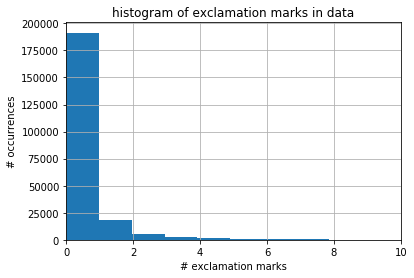

In [24]:
num_of_exclamation_marks = data_combined['comment_text'].apply(lambda x: count_occurences(x, '!'))
print('Mean #exclamation marks: ', num_of_exclamation_marks.mean())
print('Median #exclamation marks: ', num_of_exclamation_marks.median())
print('Maximum #exclamation marks: ', max(num_of_exclamation_marks))
print('Minimum #exclamation marks: ', min(num_of_exclamation_marks))

num_of_exclamation_marks[num_of_exclamation_marks < 50].hist(bins=50)
plt.title('histogram of exclamation marks in data')
plt.xlabel('# exclamation marks')
plt.xlim(0, 10)
plt.ylabel('# occurrences')
plt.show()

Mean uppercase rate:  0.05200046490462735
Median uppercase rate:  0.031287605294825514
Maximum uppercase rate:  1.0
Minimum uppercase rate:  0.0


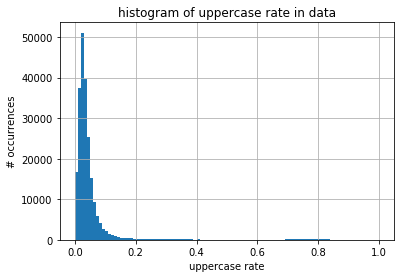

id
0000997932d777bf    0.064394
000103f0d9cfb60f    0.071429
000113f07ec002fd    0.017167
0001b41b1c6bb37e    0.017685
0001d958c54c6e35    0.029851
Name: comment_text, dtype: float64

In [27]:
count_uppercase = lambda c: sum([1 for x in c if x.isupper()])
number_uppercase_characters = data_combined['comment_text'].apply(lambda x: count_uppercase(x))
uppercase_rate = (number_uppercase_characters / comment_lengths)
print('Mean uppercase rate: ', uppercase_rate.mean())
print('Median uppercase rate: ', uppercase_rate.median())
print('Maximum uppercase rate: ', max(uppercase_rate))
print('Minimum uppercase rate: ', min(uppercase_rate))

uppercase_rate.hist(bins=100)
plt.title('histogram of uppercase rate in data')
plt.xlabel('uppercase rate')
plt.ylabel('# occurrences')
plt.show()
uppercase_rate.head()

## Examples for every category in the data

In [17]:
data_train[data_train['toxic'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0


In [18]:
data_train[data_train['severe_toxic'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0


In [19]:
data_train[data_train['obscene'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [20]:
data_train[data_train['threat'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0
006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0


In [21]:
data_train[data_train['insult'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [22]:
data_train[data_train['identity_hate'] == 1].head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
